C:\Users\avaidya\AppData\Local\Temp\ipykernel_13576\3507143804.py:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (df_counts / total_responses[:, None]) * 100


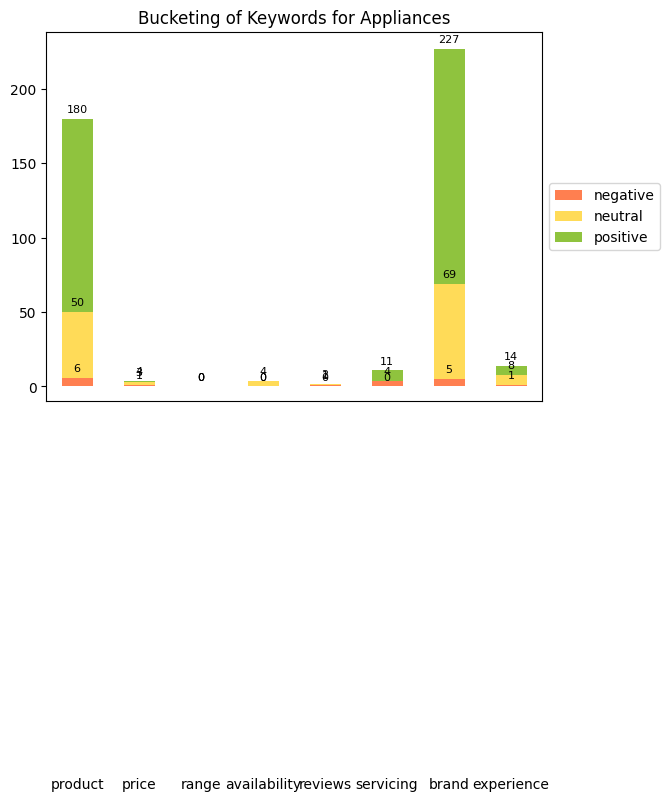

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Loading the input file
df = pd.read_csv('Interio_bucketing.csv')

# Calculate the counts for each label and category
product = df['product'].value_counts()
price = df['price'].value_counts()
range = df['range'].value_counts()
availability = df['availability'].value_counts()
reviews = df['reviews'].value_counts()
servicing = df['servicing'].value_counts()
brand = df['brand'].value_counts()
experience = df['experience'].value_counts()

# Create a DataFrame with the counts 
df_counts = pd.DataFrame({'product': product, 'price': price, 'range': range, 'availability': availability, 'reviews': reviews, 'servicing': servicing, 'brand': brand, 'experience': experience})

# Transpose the DataFrame
df_counts = df_counts.transpose()

# Calculate the total number of responses
total_responses = df_counts.sum(axis=1)

# Calculate the percentage for each category
percentages = (df_counts / total_responses[:, None]) * 100

# Create a stacked bar plot
ax = df_counts.plot(kind='bar', stacked=True, color=["#FF7F50","#FFDB58","#8FC33E"])

# Set the title and labels
plt.xticks(rotation=0)
plt.title('Bucketing of Keywords for Appliances')

# Get the current axis object
ax = plt.gca()

# Set the x-axis tick labels position to bottom
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# Set the y-axis tick labels position to left
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

# Set the x and y-axis label positions
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.1, 0.5)

# Move the legend to the right side of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Set the y-axis limits to move the total downwards
ax.set_ylim(bottom=-10)

# Add value labels to each bar with adjusted spacing
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=3)

# Adjust the spacing between the value labels
for label in ax.get_xmajorticklabels():
    label.set_y(label.get_position()[1] - 0.99)  # Adjust the value to increase or decrease spacing

# Show the plot
plt.show()
